**Bias** **Detection** **in** **Epidemiological** **Models**



                             **Anne Amina Freitas**

                              **4th April, 2025**

In this project, i aimed to detect and mitigate fairness issues in a predictive model. The task was to predict whether a patient would develop diabetes (binary classification) based on demographic and health data. Specifically, I was concerned with fairness related to the gender attribute, ensuring that the model treated males and females equally in its predictions.


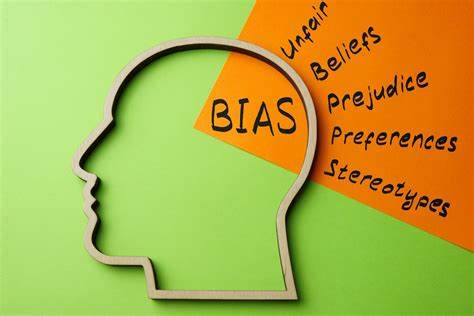
---



**My approach involved:**

1. Building a predictive model.

2. Identifying any fairness issues using the Demographic Parity Difference (DPD) metric.

3. Mitigating fairness issues using a fairness constraint from the Fairlearn library.

4. Evaluating the model's performance before and after applying fairness mitigation.



---



**Step-by-Step Breakdown of the Process**

**Step 1:** Loading and Preparing the Data:

I began by loading a publicly available dataset containing diabetes-related health data. The dataset includes both demographic (e.g., gender) and health-related features, and the target variable is whether the patient has diabetes (positive or negative).

I then pre-processed the data by converting categorical columns (like gender) into dummy variables using pd.get_dummies(). The target variable, class, was converted into a binary format (1 for "Positive" and 0 for "Negative").


**Step 2:** To simulate a real-world scenario:

 I used a simple machine learning model, Logistic Regression. This model was trained using the features (X) and the target (y), and it made predictions about whether a patient was likely to develop diabetes.


**Step 3:** Measuring Fairness Using Demographic Parity Difference (DPD):

After training the model, I calculated the Demographic Parity Difference (DPD), which measures the difference in the positive prediction rates between groups defined by a sensitive attribute, such as gender.

The DPD value was calculated as follows:

1. A high DPD indicates that the model’s predictions are biased towards one gender.

2. A low DPD suggests that the model is fair, with similar prediction rates for both genders.

3. I calculated the DPD using the Fairlearn library, which provides the demographic_parity_difference function.

4. Original DPD Result: The result was 0.50, indicating a significant disparity between males and females in the model’s predictions.

**Step 4:** Mitigating Fairness Issues with Fairlearn:

At this point, I saw that the model was unfair (due to a high DPD), meaning that males and females had very different positive prediction rates. To address this issue, I applied a fairness mitigation technique from the Fairlearn library. I used the ExponentiatedGradient algorithm, which adjusts the model's predictions to reduce the disparity between groups.


**Step 5:** Re-calculating the Demographic Parity Difference After Mitigation:

After applying the fairness mitigation technique, I recalculated the DPD to see the effect of the fairness intervention.

**Fair DPD Result After Mitigation:** The DPD was reduced to 0.02, indicating that the fairness mitigation technique significantly reduced the disparity between male and female predictions.



---


**What I Learned**


1. **Bias Detection:** I used Demographic Parity Difference (DPD) as a metric to detect bias in the model's predictions. A high DPD of 0.50 indicated a significant fairness issue, the model treated males and females differently in its predictions.

2. **Bias Mitigation:** I applied the ExponentiatedGradient algorithm from Fairlearn, which adjusted the model’s predictions to ensure fairer outcomes across the gender groups. After applying fairness mitigation, the DPD decreased to 0.02, showing that the model had become more fair while maintaining accuracy.

1. **Fairness in Machine Learning:** Fairness is crucial in machine learning, especially when sensitive attributes (such as gender, age, etc.) influence the model's predictions. Techniques like ExponentiatedGradient are useful in reducing disparities without sacrificing model performance.



---


**Ethical Implications**

It's important to ensure that machine learning models do not unfairly disadvantage specific groups. In this case, gender fairness was a concern, but the same approach could be used for other sensitive attributes like race, ethnicity, or socioeconomic status.



---


**Conclusion**
This exercise demonstrated the importance of fairness in machine learning and how tools like Fairlearn can be used to identify and mitigate bias in models. By detecting fairness issues, applying mitigation strategies, and evaluating the results, I ensured that my diabetes prediction model was more equitable and reliable.

For anyone new to fairness in machine learning, this process showed that even simple adjustments, such as using fairness constraints and metrics, can lead to significantly improved outcomes in terms of equity across different groups.



---


**Future Work**

**Further Evaluation:** You can apply other fairness metrics like Equalized Odds or Predictive Parity to evaluate the model's fairness in different ways.

**Testing on Other Sensitive Attributes:** You could explore fairness concerning other sensitive attributes like age, income, or health conditions.

**Model Performance:** After mitigating fairness issues, it’s important to evaluate whether the model’s accuracy or AUC score has been impacted, ensuring no significant tradeoff between fairness and performance.

In [1]:
!pip install fairlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 3.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from fairlearn.metrics import demographic_parity_difference

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv")

In [4]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [5]:
df.tail()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [6]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [8]:
df.isnull().sum()

,0
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


In [9]:
df.duplicated().sum()

np.int64(269)

In [10]:
df.shape

(520, 17)

In [11]:
df.size

8840

<Axes: xlabel='class'>

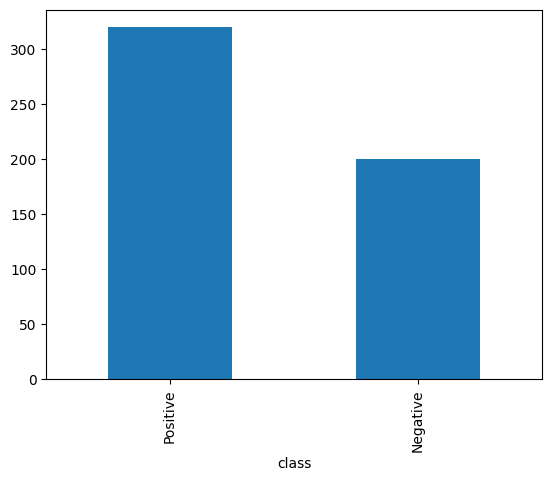

In [12]:
df['class'].value_counts().plot(kind='bar')


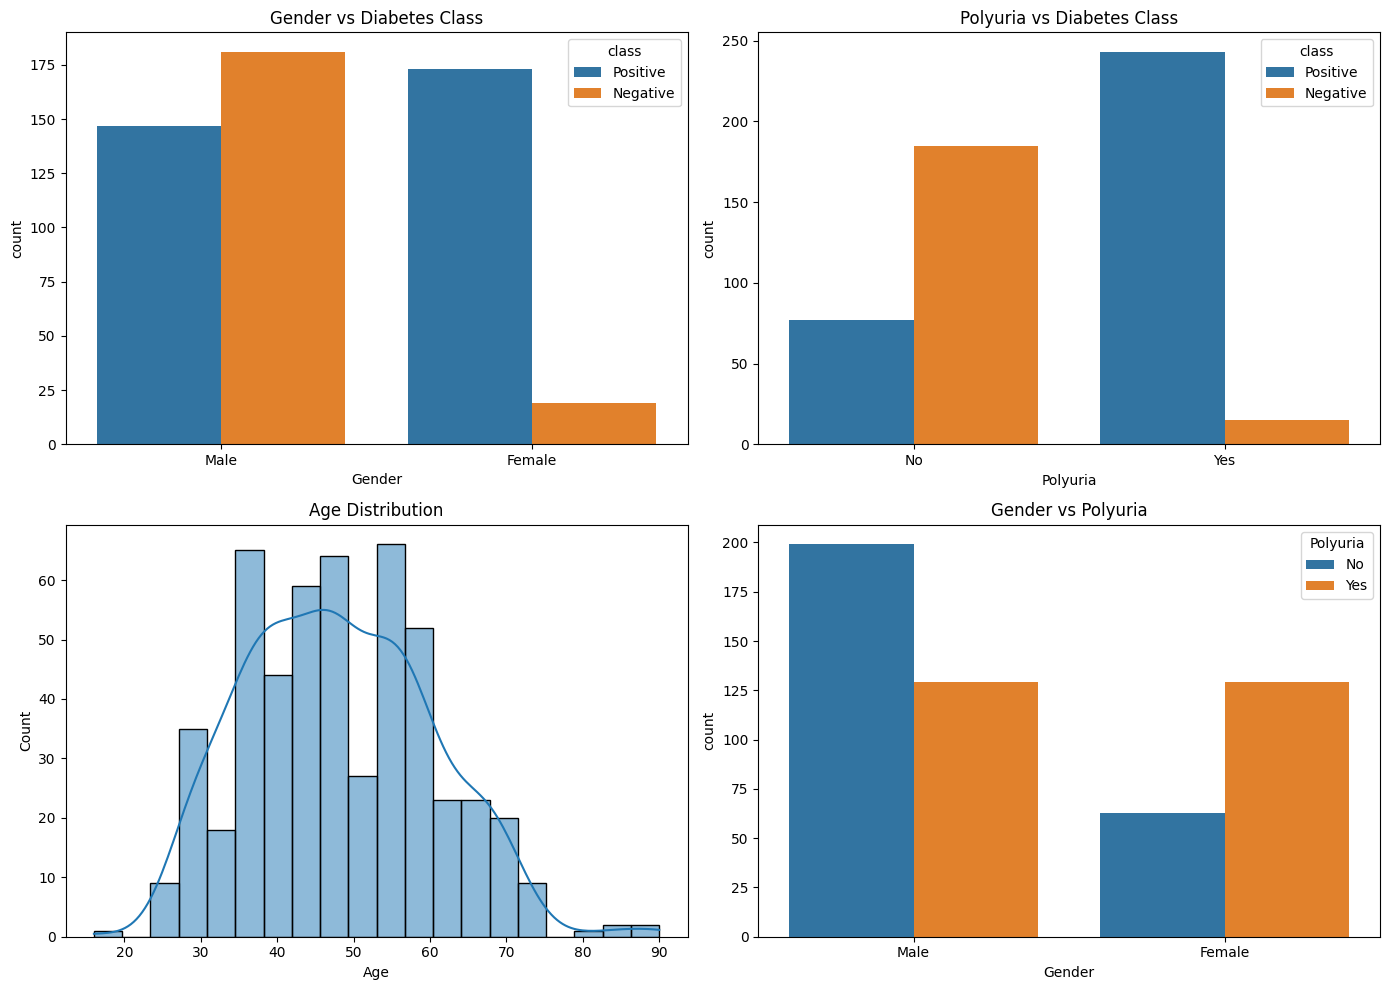

In [13]:
# Set up a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Gender vs Class
sns.countplot(data=df, x='Gender', hue='class', ax=axes[0, 0])
axes[0, 0].set_title('Gender vs Diabetes Class')

# 2. Polyuria vs Class
sns.countplot(data=df, x='Polyuria', hue='class', ax=axes[0, 1])
axes[0, 1].set_title('Polyuria vs Diabetes Class')

# 3. Age Distribution (if Age exists)
if 'Age' in df.columns:
    sns.histplot(data=df, x='Age', bins=20, kde=True, ax=axes[1, 0])
    axes[1, 0].set_title('Age Distribution')

# 4. Gender vs Polyuria
sns.countplot(data=df, x='Gender', hue='Polyuria', ax=axes[1, 1])
axes[1, 1].set_title('Gender vs Polyuria')

# Adjust layout
plt.tight_layout()
plt.show()


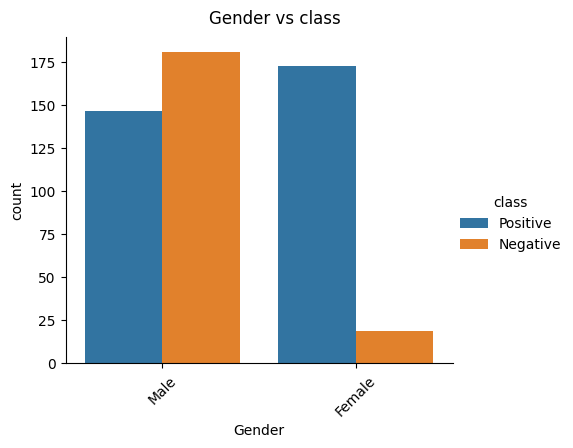

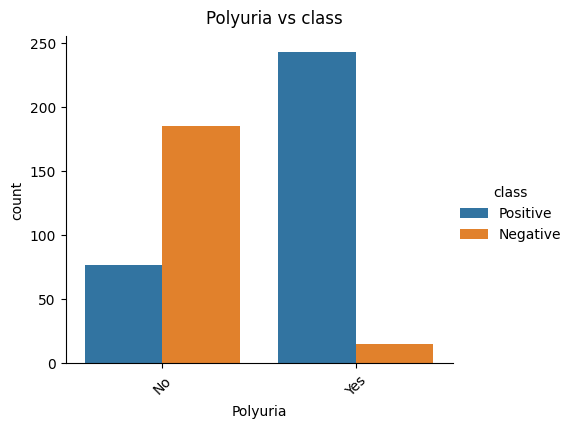

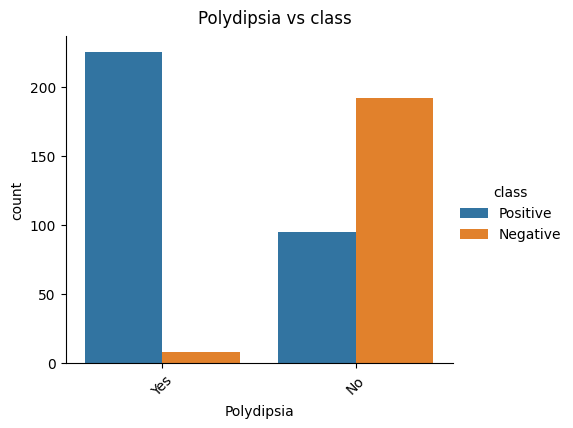

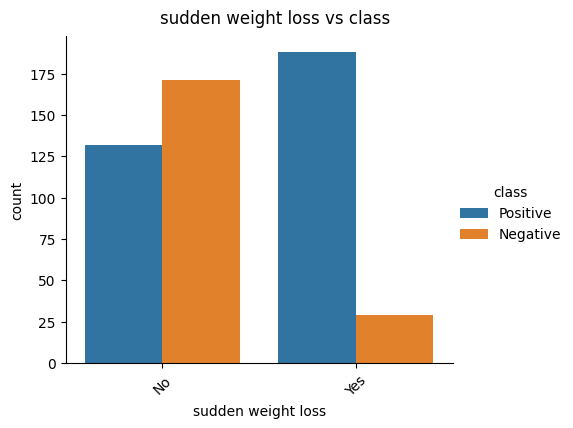

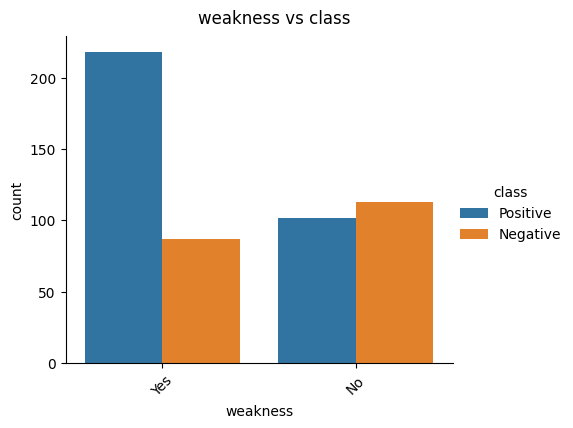

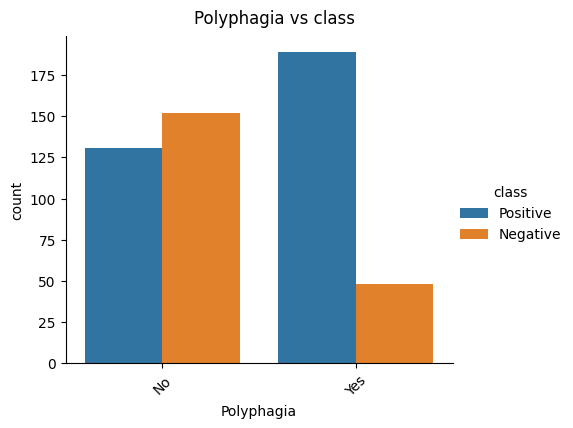

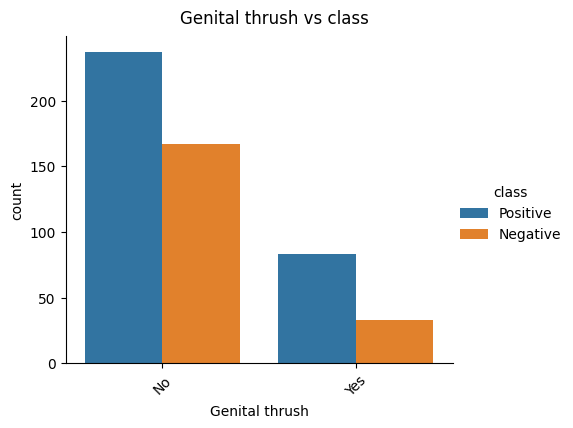

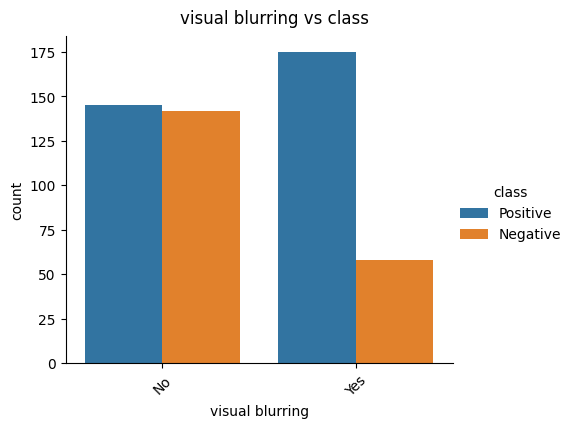

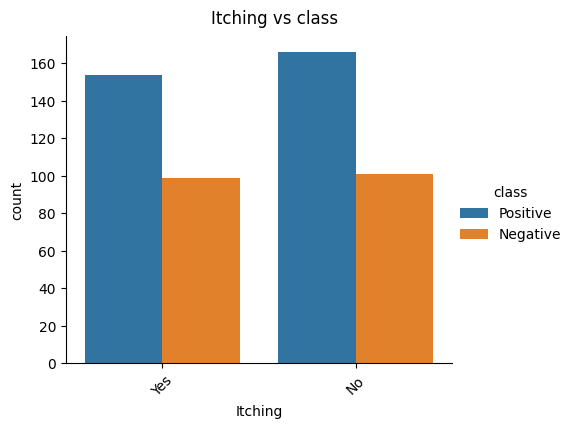

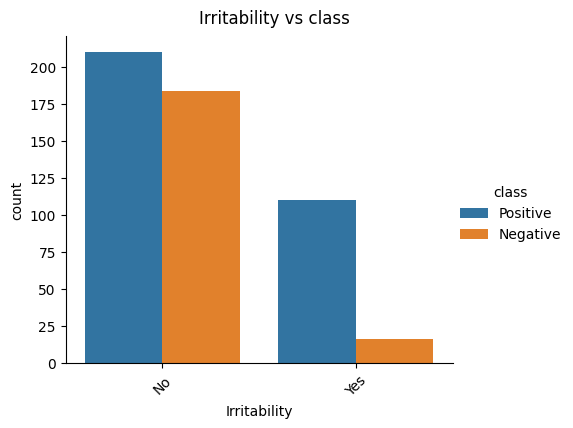

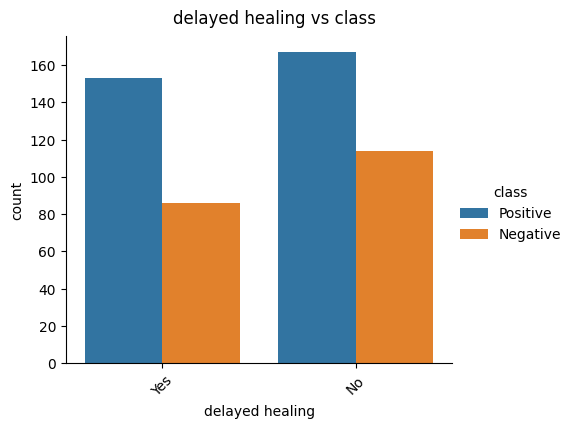

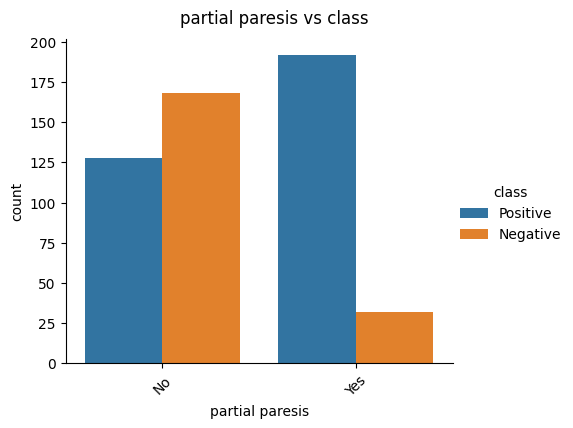

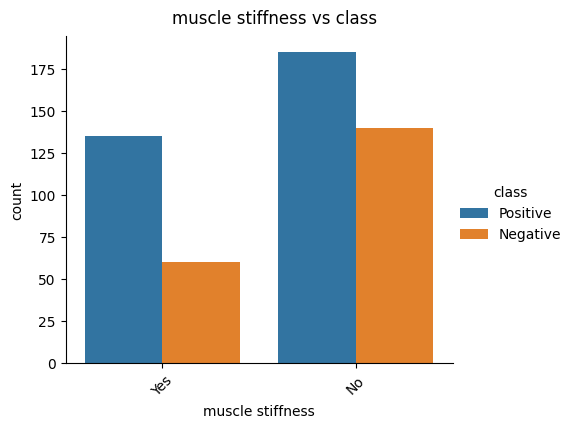

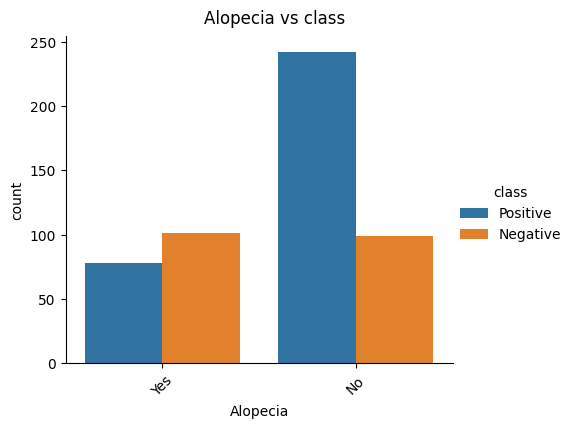

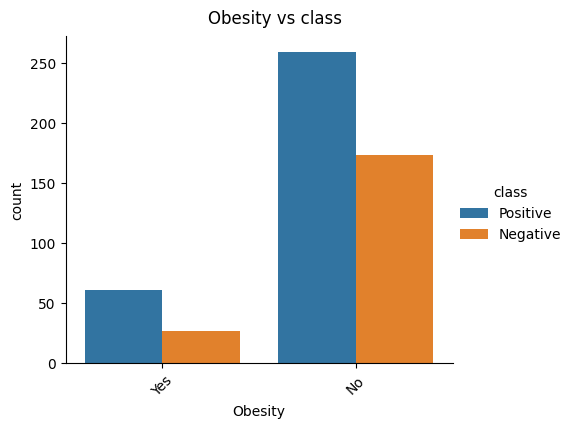

In [14]:
# Select categorical features (excluding 'class')
cat_cols = [col for col in df.columns if df[col].dtype == 'object' and col != 'class']

# Plot a grid of categorical feature distributions grouped by class
for col in cat_cols:
    g = sns.catplot(data=df, x=col, hue='class', kind='count', height=4, aspect=1.2)
    g.set_xticklabels(rotation=45)
    g.fig.suptitle(f'{col} vs class', y=1.03)
    plt.show()


<Axes: xlabel='Age_bin', ylabel='count'>

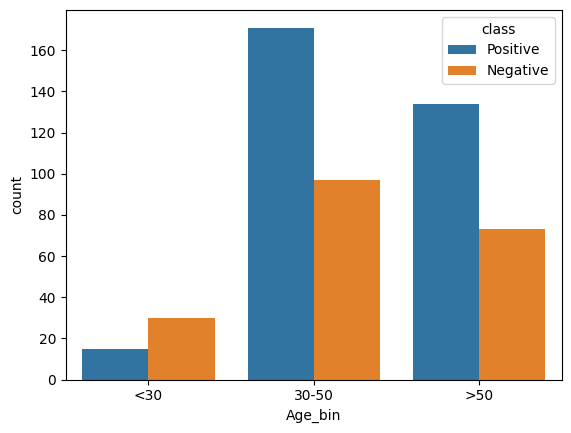

In [15]:
df['Age_bin'] = pd.cut(df['Age'], bins=[0,30,50,100], labels=['<30','30-50','>50'])
sns.countplot(data=df, x='Age_bin', hue='class')

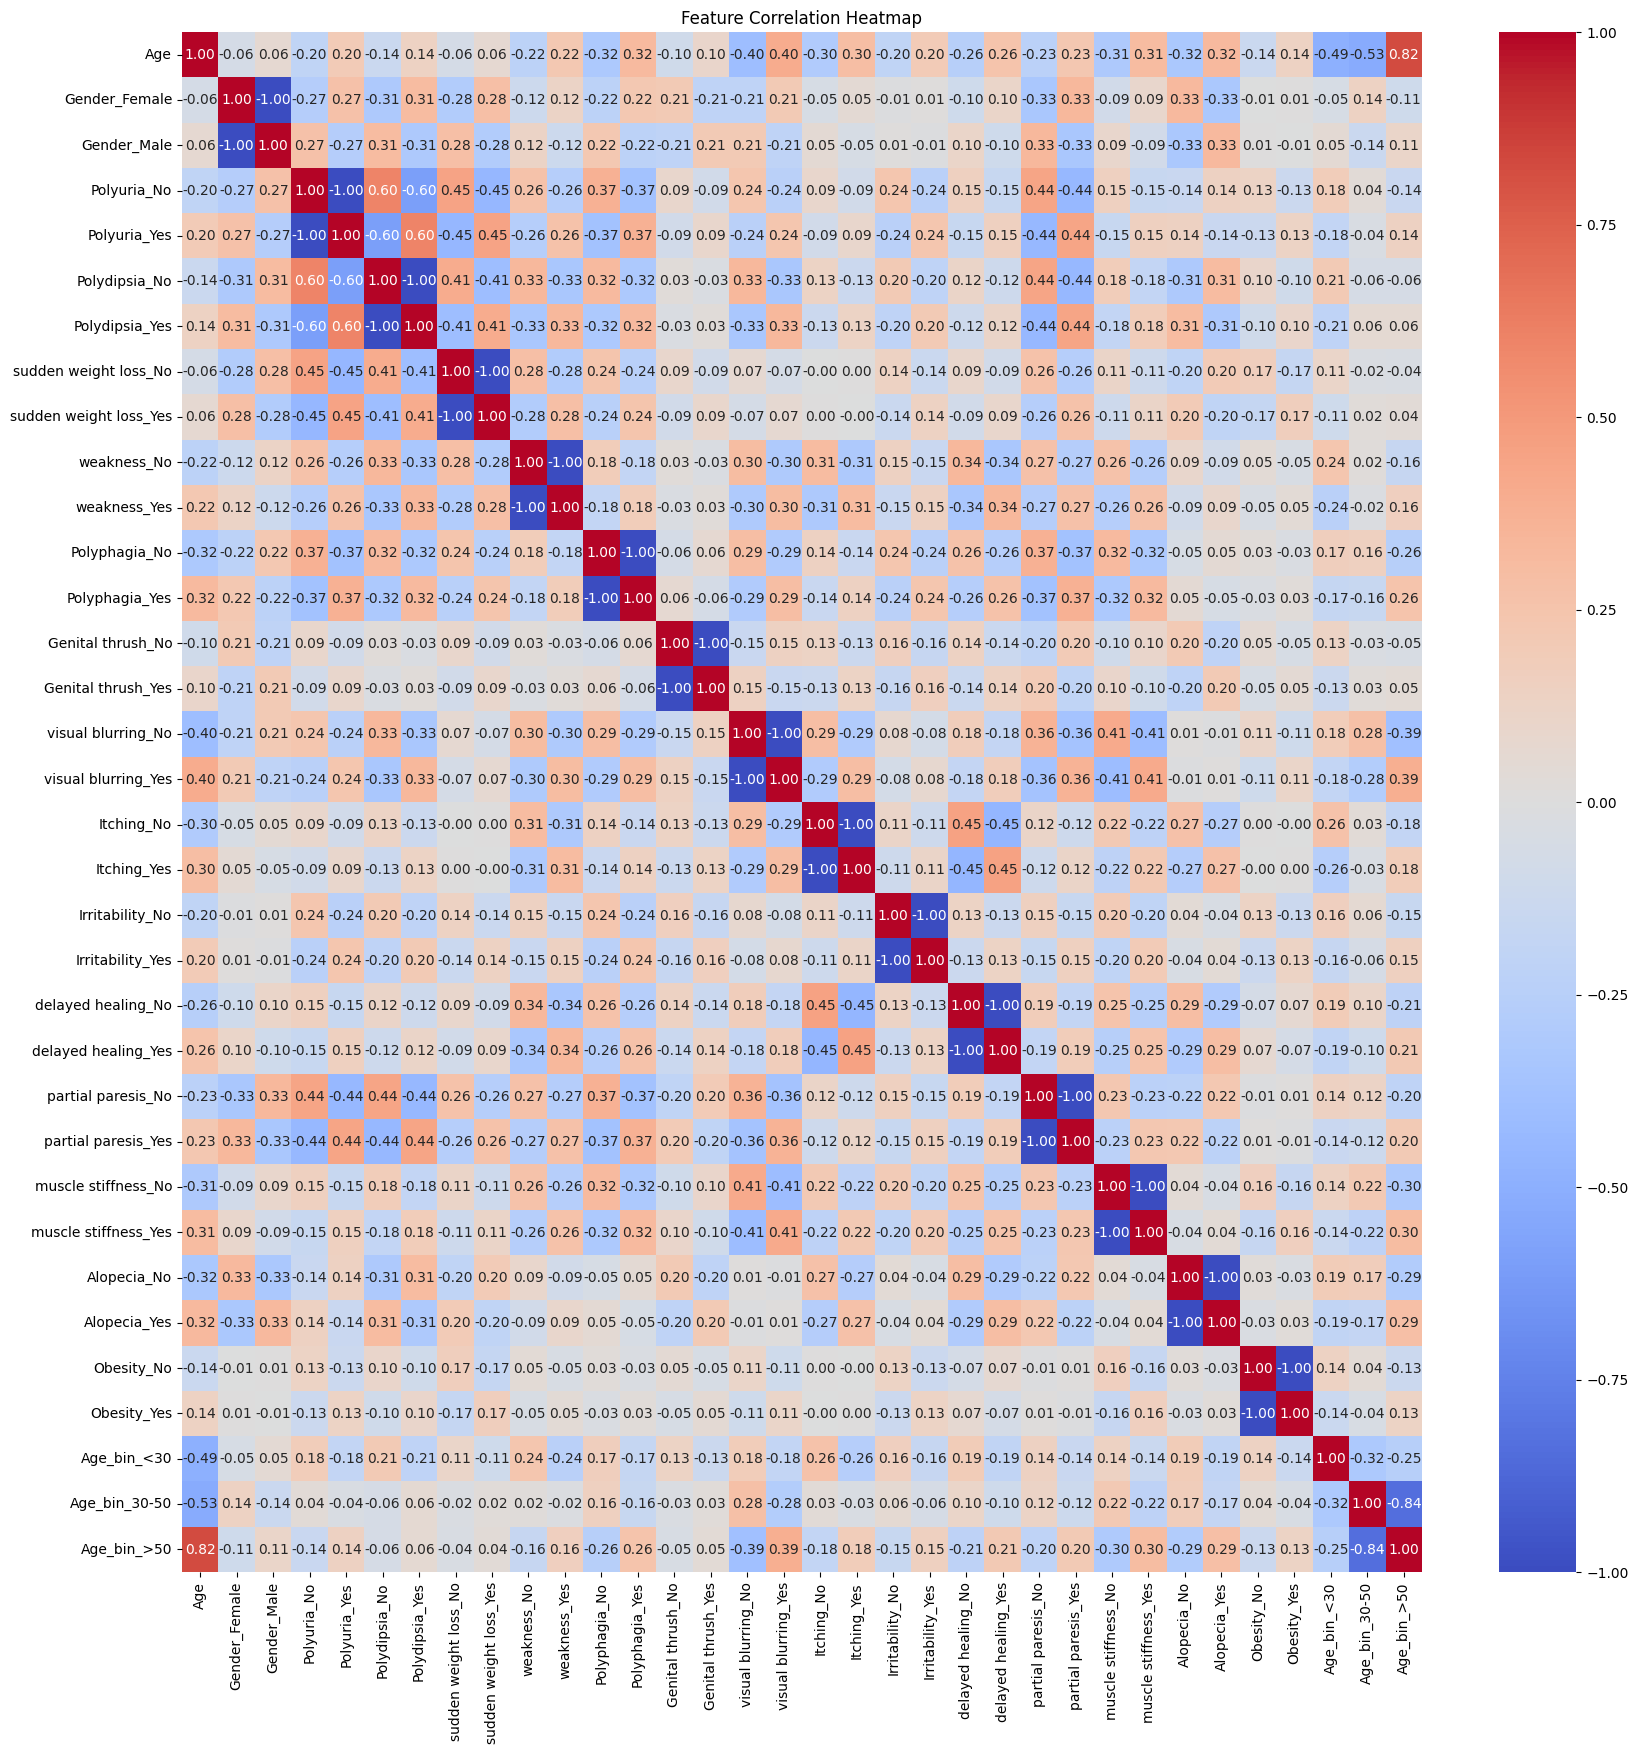

In [16]:
corr = pd.get_dummies(df.drop(columns=['class'])).corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [17]:
# Simulate a binary prediction task (e.g., disease risk)
X = pd.get_dummies(df.drop(columns=['class']))
y = (df['class'] == 'Positive').astype(int)

In [18]:
# Split data by gender (example sensitive attribute)
group_A = X[X['Gender_Male'] == 1]
group_B = X[X['Gender_Female'] == 0]

In [19]:
df.groupby('Gender').mean(numeric_only=True)

,Age
Gender,
Female,47.031250
Male,48.612805


In [20]:
# Train a simple model
model = LogisticRegression()
model.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
predictions = model.predict(X)

In [22]:
# Calculate fairness metric
dem_parity_diff = demographic_parity_difference(
    y_true=y, y_pred=predictions, sensitive_features=X['Gender_Male']
)
print(f"Demographic Parity Difference: {dem_parity_diff:.2f}")

Demographic Parity Difference: 0.50


In [23]:
from fairlearn.reductions import DemographicParity, ExponentiatedGradient
# Fair model using mitigation
mitigator = ExponentiatedGradient(
    LogisticRegression(max_iter=1000),
    constraints=DemographicParity()
)

constraint = DemographicParity()
mitigator = ExponentiatedGradient(LogisticRegression(), constraints=constraint)
mitigator.fit(X, y, sensitive_features=X['Gender_Male'])
fair_preds = mitigator.predict(X)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [24]:
original_dpd = demographic_parity_difference(y, predictions, sensitive_features=X['Gender_Male'])
fair_dpd = demographic_parity_difference(y, fair_preds, sensitive_features=X['Gender_Male'])

print(f"Original DPD: {original_dpd:.2f}")
print(f"Fair DPD after mitigation: {fair_dpd:.2f}")


Original DPD: 0.50
Fair DPD after mitigation: 0.03


In [25]:
# Fair model using mitigation
mitigator = ExponentiatedGradient(
    LogisticRegression(max_iter=1000),
    constraints=DemographicParity()
)
# Assuming 'Gender_Male' is the intended sensitive attribute
sensitive_attr = X['Gender_Male']  # Define sensitive_attr
mitigator.fit(X, y, sensitive_features=sensitive_attr)
fair_preds = mitigator.predict(X)

In [26]:
# Calculate DPD
original_dpd = demographic_parity_difference(y, predictions, sensitive_features=sensitive_attr) # Changed preds to predictions
fair_dpd = demographic_parity_difference(y, fair_preds, sensitive_features=sensitive_attr)

<ipython-input-27-31f835f8f789>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dpd_scores, x='Model', y='DPD', palette='Set2')


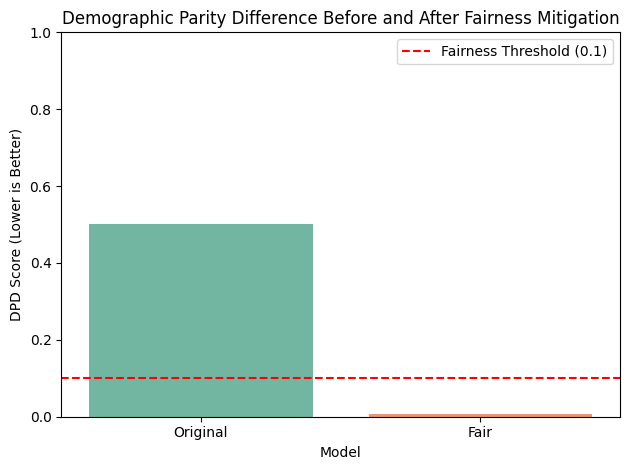

In [27]:
# Visualization
dpd_scores = pd.DataFrame({
    'Model': ['Original', 'Fair'],
    'DPD': [original_dpd, fair_dpd]
})

sns.barplot(data=dpd_scores, x='Model', y='DPD', palette='Set2')
plt.title("Demographic Parity Difference Before and After Fairness Mitigation")
plt.ylim(0, 1)
plt.axhline(0.1, color='red', linestyle='--', label='Fairness Threshold (0.1)')
plt.legend()
plt.ylabel("DPD Score (Lower is Better)")
plt.tight_layout()
plt.show()

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Create a pipeline that scales the data and trains logistic regression
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)  # increase max_iter to ensure convergence
)

# Fit the model
pipeline.fit(X, y)

# Predict
predictions = pipeline.predict(X)

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Create pipeline with scaling
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000, random_state=42)
)

# Evaluate accuracy using cross-validation
scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
print("Cross-validated accuracy scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validated accuracy scores: [0.90384615 0.94230769 0.875      0.96153846 0.94230769]
Mean accuracy: 0.925


In [30]:
from sklearn.model_selection import GridSearchCV

# Define pipeline
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000, random_state=42)
)

# Define hyperparameters to tune
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l2'],
    'logisticregression__solver': ['lbfgs']
}

# Grid search
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

print("Best parameters:", grid.best_params_)
print("Best cross-validated accuracy:", grid.best_score_)


Best parameters: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}
Best cross-validated accuracy: 0.9307692307692308


In [37]:
from fairlearn.metrics import demographic_parity_difference

# Use best model
best_model = grid.best_estimator_

# Predictions
predictions = best_model.predict(X)

# Fairness metric
dpd = demographic_parity_difference(y_true=y, y_pred=predictions, sensitive_features=X['Gender_Male'])
print(f"Demographic Parity Difference after tuning: {dpd:.2f}")


Demographic Parity Difference after tuning: 0.50


In [38]:
 from fairlearn.reductions import GridSearch, DemographicParity
from sklearn.linear_model import LogisticRegression

# Define the mitigator
mitigator = GridSearch(
    estimator=LogisticRegression(solver='liblinear'),
    constraints=DemographicParity(),
)

# Fit the mitigator, providing sensitive features during the fit method
mitigator.fit(X, y, sensitive_features=X['Gender_Male'])

# Get the predictions directly from the mitigator
fair_preds = mitigator.predict(X)  # Changed this line

# Calculate and print the DPD
dpd = demographic_parity_difference(y_true=y, y_pred=fair_preds, sensitive_features=X['Gender_Male'])  # Changed this line
print(f"✅ Fair DPD after mitigation: {dpd:.2f}")

✅ Fair DPD after mitigation: 0.26


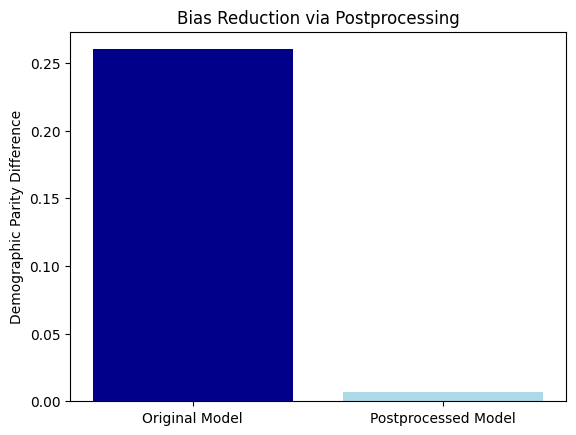

In [42]:
# Plot disparity in predictions
plt.bar(
    ['Original Model', 'Postprocessed Model'],
    [dpd, fair_dpd],
    color=['darkblue', 'lightblue']
)
plt.title("Bias Reduction via Postprocessing")
plt.ylabel("Demographic Parity Difference")
plt.show()
